In [6]:
import xarray as xr
import numpy as np
import geopandas as gpd
from earthkit.climate import shapes

In [7]:
dataset = xr.open_dataset(
    "test_data/era5_temperature_europe_2015.grib", chunks={'time': 1}
)
dataarray = dataset.t2m
geodataframe = gpd.read_file(
    "test_data/nuts/NUTS_RG_60M_2021_4326_LEVL_0.geojson"
)

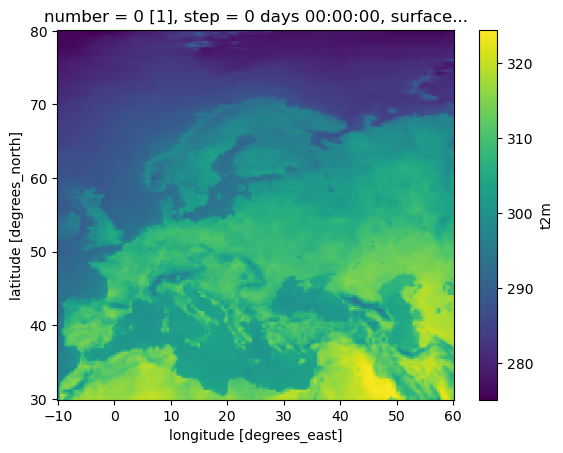

In [15]:
dataarray.max(dim='time').plot()

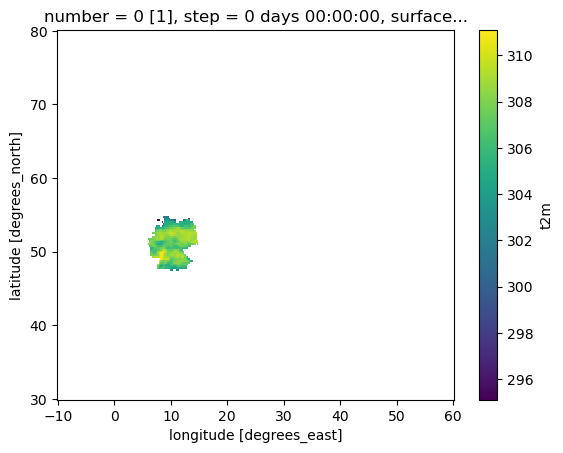

In [16]:
masked_data = shapes.masks(dataarray, geodataframe)
masked_data.sel(FID='DE').max(dim='time').plot()

In [11]:
reduced_data = shapes.reduce(dataarray, geodataframe, how=np.nanmax)
reduced_data

<xarray.DataArray 't2m' (FID: 37, time: 1460)>
array([[279.88135, 280.61102, 281.33185, ..., 277.7212 , 280.78748,
        281.04398],
       [264.86768, 266.3454 , 269.08966, ..., 268.93408, 273.9906 ,
        269.51077],
       [277.11377, 277.34735, 277.97247, ..., 271.02783, 271.52966,
        270.31937],
       ...,
       [274.09814, 275.03876, 276.59552, ..., 269.32666, 273.7621 ,
        271.876  ],
       [280.16846, 279.87665, 278.94513, ..., 281.21338, 283.03357,
        282.04788],
       [281.73486, 282.1579 , 281.6502 , ..., 281.2251 , 280.1527 ,
        280.6592 ]], dtype=float32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * FID         (FID) object 'DK' 'RS' 'EE' 'EL' 'ES' ... 'CY' 'CZ' 'DE' 'NO'

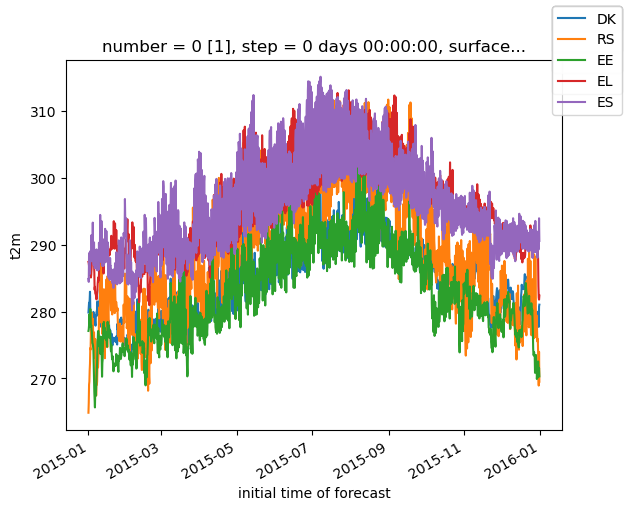

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for fid in geodataframe.NUTS_ID[:5]:
    reduced_data.sel(FID=fid).plot(ax=ax, label=fid)
    fig.legend()


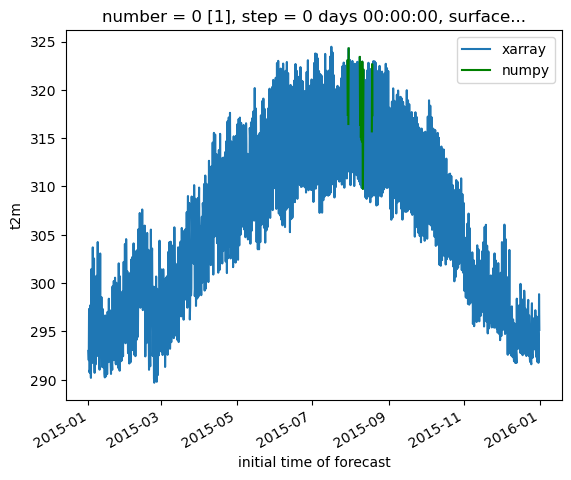

In [33]:
mdataarray = dataarray.where(dataarray>273, other=np.nan)
# mdataarray.assign_attrs({'_FillValue': np.nan})
fig, ax = plt.subplots(1,1)
mdataarray.max(dim=['latitude','longitude']).plot(ax=ax, label='xarray')
ax.plot(
    mdataarray.time.values,
    np.max(mdataarray.values.reshape(1460,-1), axis=1),
    label='numpy', color='green'
)
plt.legend()

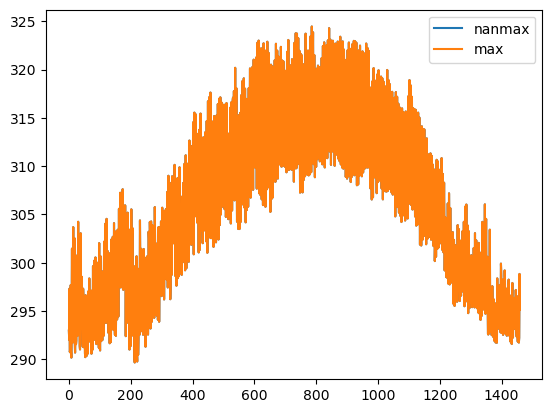

In [47]:
mdataarray = dataarray.where(dataarray>273, other=np.nan)
mdataarray = mdataarray.to_masked_array()
fig, ax = plt.subplots(1,1)
ax.plot(np.nanmax(mdataarray.reshape(1460,-1), axis=1), label='nanmax')
ax.plot(np.max(mdataarray.reshape(1460,-1), axis=1), label='max')
plt.legend()